Source of Data:
https://www.nature.com/articles/sdata201861#Sec8m
Unifying cancer and normal RNA sequencing data from different sources

Goal of notebook:

Take different subtypes of cancer and cluster them to better understand differences in expression between them.

Additionally do differential gene expression analysis on healthly vs tumor, and see the effect on PCA to clustering


Types of cancer:
Lung: LUAD, LUSC
Colon: Sigmoid, transverse
Kidney cortex: KIRC,KIRP,KICH

-----

GTEX: Database of different tissues completly from non-cancer donors
TCGA: From the cancer genome atlas program data matched for a patient from tumor and surrounding "normal" tissue



TABLE 1: List of cancer data avalible

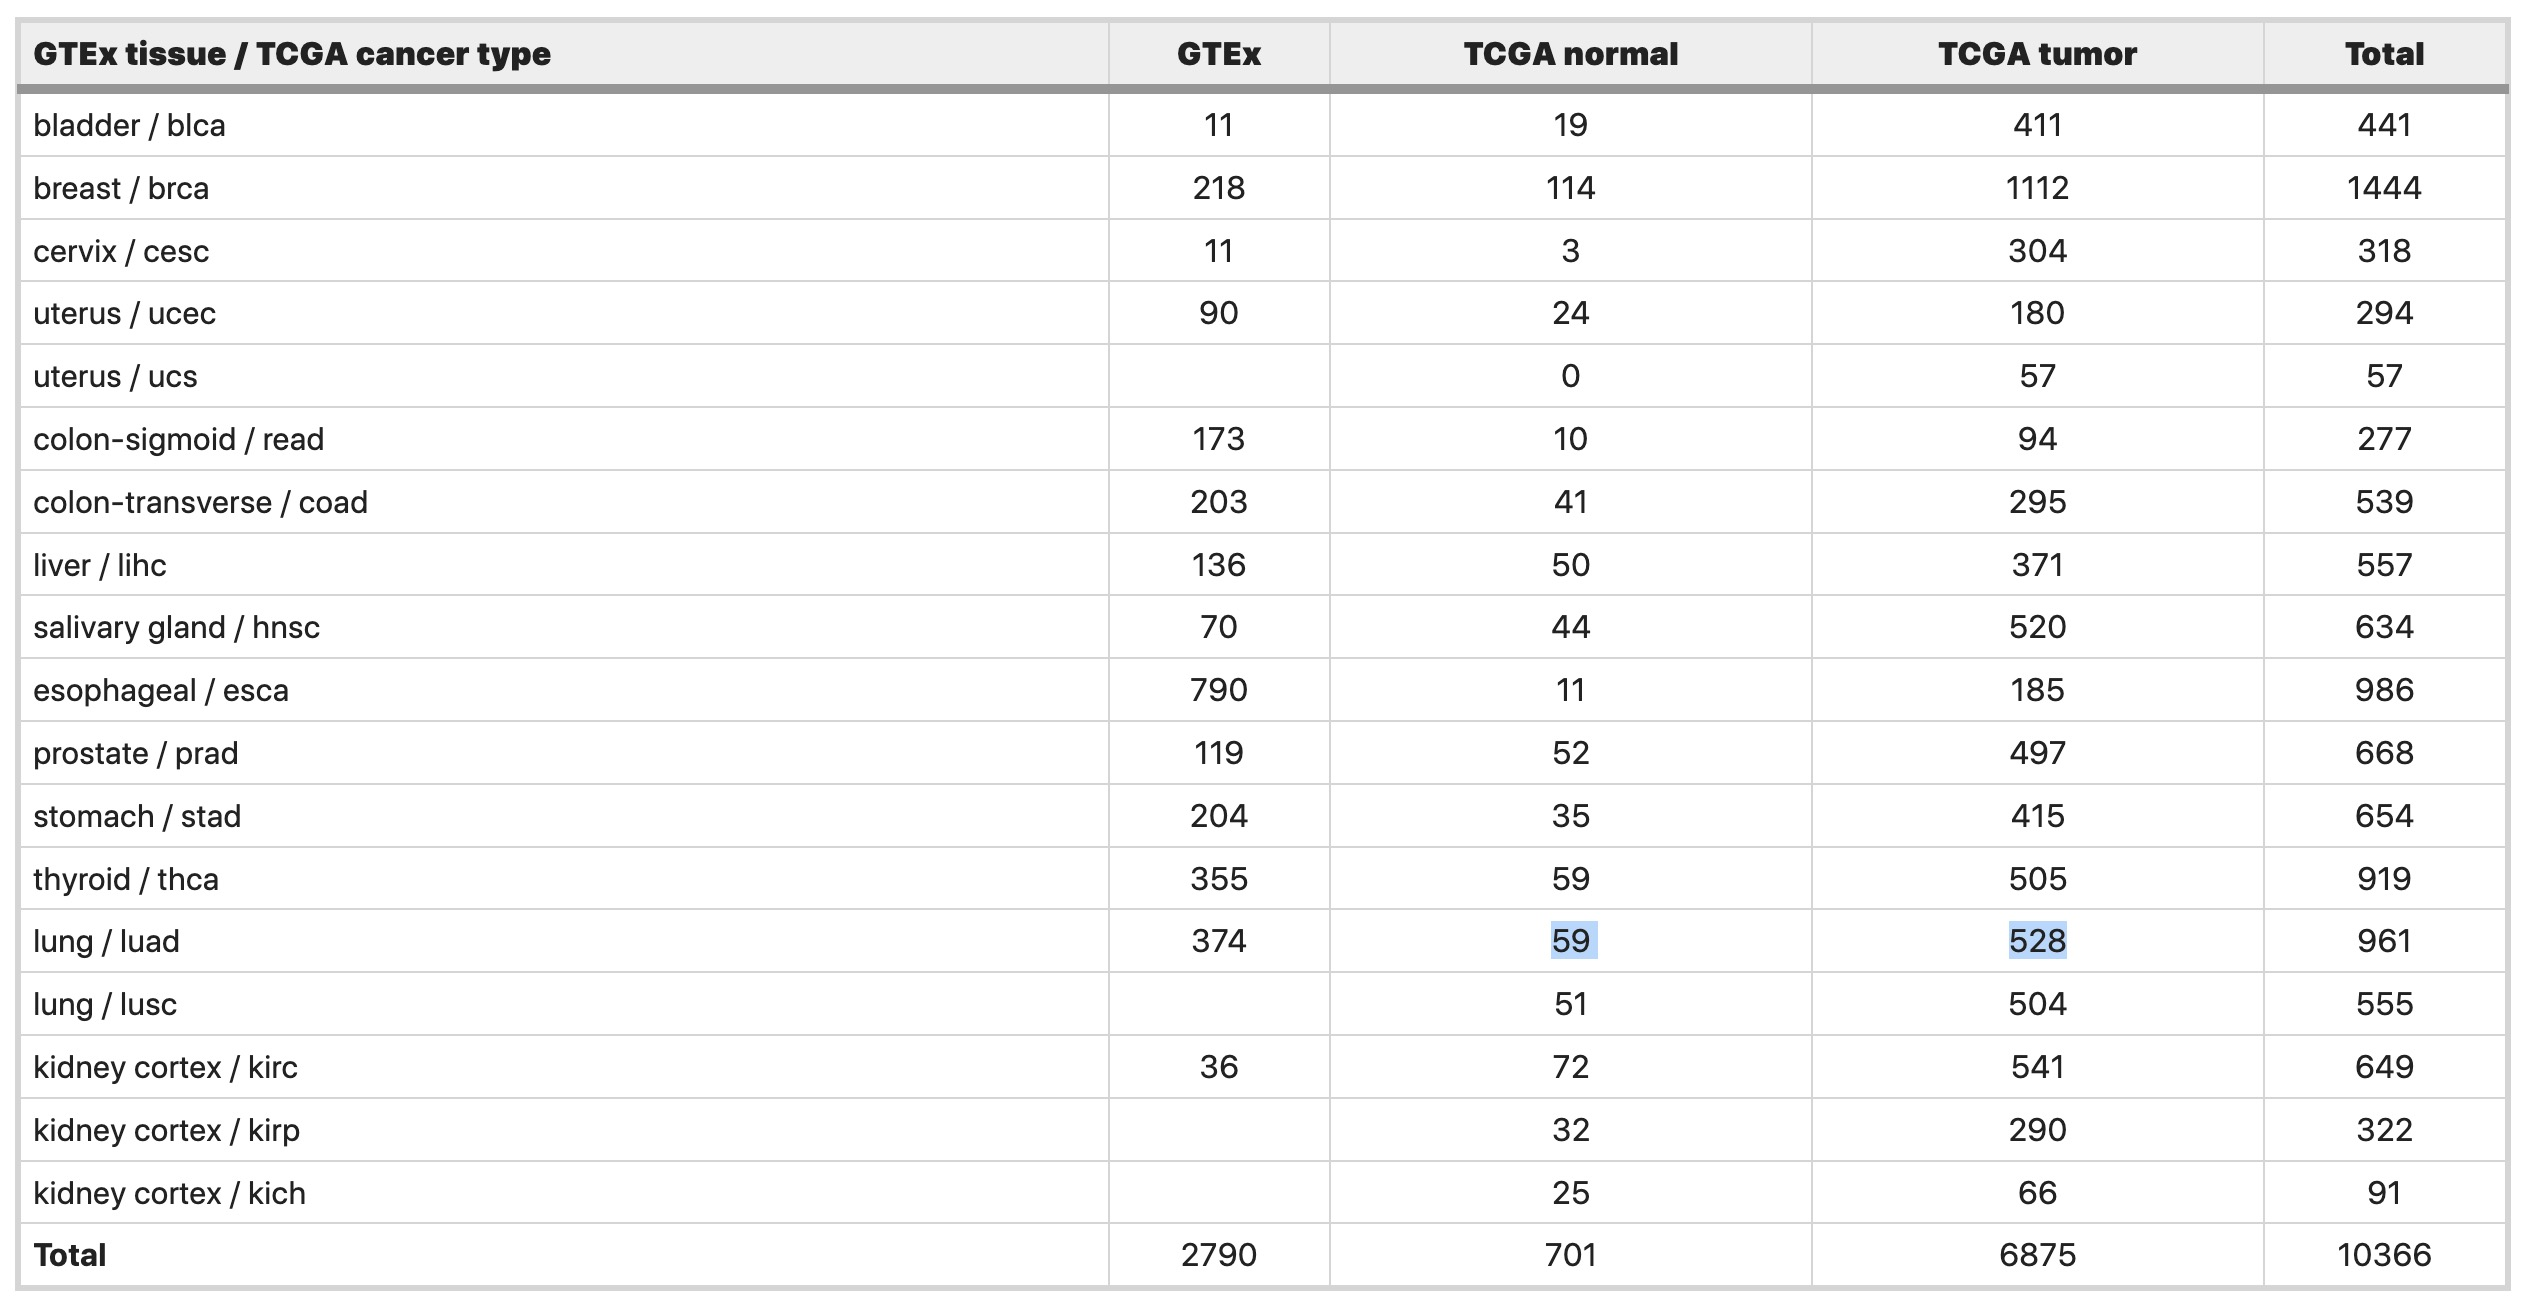

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Using RSEMcounts because DEseq2 does differential gene analysis through count data
!ls | grep "rsemcount" > file_names.txt

In [1]:
f = open("file_names.txt", "r")
list_files = f.read().split('\n')

list_files

['luadrsemcounttcgat.txt',
 'luadrsemcounttcga.txt',
 'lungrsemcountgtex.txt',
 'luscrsemcounttcgat.txt',
 'luscrsemcounttcga.txt',
 '']

In [4]:
#Loading in data
lung_luad_TCGA_norm = pd.read_csv(list_files[1],sep='\t')
lung_luad_TCGA_tumor = pd.read_csv(list_files[0],sep='\t')


In [6]:
#Create subsets of TCGA norm and tumor where the IDS are found in both datasets: Same Patient
lung_luad_norm = sorted(lung_luad_TCGA_norm)
lung_luad_tumor = sorted(lung_luad_TCGA_tumor)


In [7]:
matching_IDs_norm = []

#find the IDs in lung_luad_norm that are the same in the tumor
#in order to match patients tumor and "normal" tissue

for ID in lung_luad_norm[2:]:
    print("-".join(ID.split('-')[0:3]))
    #only the first three sections of ID are found in both tumor and normal tissue
    ID_3 = "-".join(ID.split('-')[0:3])
    
    if any(ID_3 in ID_t for ID_t in lung_luad_tumor[2:]):
        matching_IDs_norm.append(ID)
        
matching_IDs_norm

TCGA-38-4625
TCGA-38-4626
TCGA-38-4627
TCGA-38-4632
TCGA-44-2655
TCGA-44-2657
TCGA-44-2661
TCGA-44-2662
TCGA-44-2665
TCGA-44-2668
TCGA-44-3396
TCGA-44-3398
TCGA-44-5645
TCGA-44-6144
TCGA-44-6145
TCGA-44-6146
TCGA-44-6147
TCGA-44-6148
TCGA-44-6776
TCGA-44-6777
TCGA-44-6778
TCGA-49-4490
TCGA-49-4512
TCGA-49-6742
TCGA-49-6743
TCGA-49-6744
TCGA-49-6745
TCGA-49-6761
TCGA-50-5930
TCGA-50-5931
TCGA-50-5932
TCGA-50-5933
TCGA-50-5935
TCGA-50-5936
TCGA-50-5939
TCGA-50-6595
TCGA-55-6968
TCGA-55-6969
TCGA-55-6970
TCGA-55-6971
TCGA-55-6972
TCGA-55-6975
TCGA-55-6978
TCGA-55-6979
TCGA-55-6980
TCGA-55-6981
TCGA-55-6982
TCGA-55-6983
TCGA-55-6984
TCGA-55-6985
TCGA-55-6986
TCGA-73-4676
TCGA-91-6828
TCGA-91-6829
TCGA-91-6831
TCGA-91-6835
TCGA-91-6836
TCGA-91-6847
TCGA-91-6849


['TCGA-38-4625-11A-01R-1758-07',
 'TCGA-38-4626-11A-01R-1758-07',
 'TCGA-38-4627-11A-01R-1758-07',
 'TCGA-38-4632-11A-01R-1755-07',
 'TCGA-44-2655-11A-01R-1758-07',
 'TCGA-44-2657-11A-01R-1758-07',
 'TCGA-44-2661-11A-01R-1758-07',
 'TCGA-44-2662-11A-01R-1758-07',
 'TCGA-44-2665-11A-01R-1758-07',
 'TCGA-44-2668-11A-01R-1758-07',
 'TCGA-44-3396-11A-01R-1758-07',
 'TCGA-44-3398-11B-01R-1758-07',
 'TCGA-44-5645-11A-01R-1628-07',
 'TCGA-44-6145-11A-01R-1858-07',
 'TCGA-44-6146-11A-01R-1858-07',
 'TCGA-44-6147-11A-01R-1858-07',
 'TCGA-44-6148-11A-01R-1858-07',
 'TCGA-44-6776-11A-01R-1858-07',
 'TCGA-44-6777-11A-01R-1858-07',
 'TCGA-44-6778-11A-01R-1858-07',
 'TCGA-49-4490-11A-01R-1858-07',
 'TCGA-49-6742-11A-01R-1858-07',
 'TCGA-49-6743-11A-01R-1858-07',
 'TCGA-49-6744-11A-01R-1858-07',
 'TCGA-49-6745-11A-01R-1858-07',
 'TCGA-49-6761-11A-01R-1949-07',
 'TCGA-50-5930-11A-01R-1755-07',
 'TCGA-50-5931-11A-01R-1858-07',
 'TCGA-50-5932-11A-01R-1755-07',
 'TCGA-50-5933-11A-01R-1755-07',
 'TCGA-50-

In [8]:
#Take the correct subset from TCGA from whole dataset
matching_subset_norm = matching_IDs_norm.copy()[0:11]

tumor_IDs = []

for ID in matching_subset_norm:
    ID_3 = "-".join(ID.split('-')[0:3])
    tumor_IDs = tumor_IDs + [x for x in lung_luad_tumor if ID_3 in x]
    
lung_luad_TCGA_norm_subset = lung_luad_TCGA_norm.copy()[lung_luad_TCGA_norm.columns[lung_luad_TCGA_norm.columns.isin(matching_subset_norm)]]
lung_luad_TCGA_tumor_subset = lung_luad_TCGA_tumor.copy()[lung_luad_TCGA_tumor.columns[lung_luad_TCGA_tumor.columns.isin(tumor_IDs)]]


In [9]:
lung_luad_TCGA_norm_subset['Hugo_Symbol'] = lung_luad_TCGA_norm['Hugo_Symbol']
lung_luad_TCGA_tumor_subset['Hugo_Symbol'] = lung_luad_TCGA_tumor['Hugo_Symbol']

In [11]:
norm_TCGA = lung_luad_TCGA_norm_subset.set_index('Hugo_Symbol')#.to_csv('lung_luad_TCGA_norm_subset.csv',index=True)

tumor_TCGA = lung_luad_TCGA_tumor_subset.set_index('Hugo_Symbol')#.to_csv('lung_luad_TCGA_tumor_subset.csv',index=True)


result = pd.concat([tumor_TCGA,norm_TCGA],axis=1)

result_columns = sorted(result)

result[result_columns] = result[result_columns].apply(np.int64)


result

,TCGA-38-4625-01A-01R-1206-07,TCGA-44-3396-01A-01R-1206-07,TCGA-38-4627-01A-01R-1206-07,TCGA-38-4626-01A-01R-1206-07,TCGA-44-2665-01A-01R-A278-07,TCGA-44-2661-01A-01R-1107-07,TCGA-44-2657-01A-01R-1107-07,TCGA-44-2668-01A-01R-0946-07,TCGA-44-2668-01A-01R-A278-07,TCGA-44-2662-01A-01R-0946-07,...,TCGA-38-4627-11A-01R-1758-07,TCGA-44-2665-11A-01R-1758-07,TCGA-44-2662-11A-01R-1758-07,TCGA-44-2661-11A-01R-1758-07,TCGA-44-2668-11A-01R-1758-07,TCGA-38-4625-11A-01R-1758-07,TCGA-44-3396-11A-01R-1758-07,TCGA-44-2657-11A-01R-1758-07,TCGA-38-4626-11A-01R-1758-07,TCGA-44-2655-11A-01R-1758-07
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
OR11G2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEFB123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SBNO2,0,17399,4915,16662,2887,3285,2717,19786,8347,10144,...,2599,6879,5576,3563,16320,2795,11618,3317,6070,4630
HSD3B1,0,0,0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
EIF4E,5,5587,2950,4971,3629,3891,2055,4812,1934,4747,...,2452,2272,1408,1660,2911,2699,2744,1516,3769,2775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZBTB48,0,1767,671,1940,878,915,1058,979,344,960,...,486,1112,739,654,732,997,1125,655,1352,1051
RAB19,0,164,37,70,48,57,31,52,62,54,...,15,25,8,18,14,10,18,20,17,21
KLHL21,0,3140,2979,5001,958,2151,1941,2601,1118,3714,...,1270,2817,2887,2583,3405,3295,3394,2248,2430,3779


In [12]:
#Outputing the processed subset of data to load into DESeq2
result.to_csv('lung_luad_TCGA_tumor_norm_subset_3.csv',index=True)

In [22]:
sample_info = pd.read_csv("Luad_TCGA_sampleinfo.csv",sep=',')

sample_info = sample_info.copy().set_index('Unnamed: 0')
sample_info


,Cancer_or_healthy
Unnamed: 0,
TCGA-38-4625-01A-01R-1206-07,Cancer
TCGA-44-3396-01A-01R-1206-07,Cancer
TCGA-38-4627-01A-01R-1206-07,Cancer
TCGA-38-4626-01A-01R-1206-07,Cancer
TCGA-44-2665-01A-01R-A278-07,Cancer
TCGA-44-2661-01A-01R-1107-07,Cancer
TCGA-44-2657-01A-01R-1107-07,Cancer
TCGA-44-2668-01A-01R-0946-07,Cancer
TCGA-44-2668-01A-01R-A278-07,Cancer


In [45]:
sample_info.to_csv('lung_luad_sampleinfo_indexed.csv',index=True)



In [58]:
#Comparing PCA between healthy and cancer lung, all genes vs top 200 most differentially expressed genes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [96]:
#Lists of IDS
matching_subset_norm
tumor_IDs

['TCGA-38-4625-01A-01R-1206-07',
 'TCGA-38-4625-01A-01R-1206-07.1',
 'TCGA-38-4626-01A-01R-1206-07',
 'TCGA-38-4627-01A-01R-1206-07',
 'TCGA-38-4632-01A-01R-1755-07',
 'TCGA-44-2655-01A-01R-0946-07',
 'TCGA-44-2657-01A-01R-1107-07',
 'TCGA-44-2661-01A-01R-1107-07',
 'TCGA-44-2662-01A-01R-0946-07',
 'TCGA-44-2662-01A-01R-A278-07',
 'TCGA-44-2665-01A-01R-0946-07',
 'TCGA-44-2665-01A-01R-A278-07',
 'TCGA-44-2668-01A-01R-0946-07',
 'TCGA-44-2668-01A-01R-A278-07',
 'TCGA-44-3396-01A-01R-1206-07']

In [13]:
#convert FPKM to TPM for the right files
lung_luad_TCGA_norm_FPKM = pd.read_csv("luadrsemfpkmtcga_healthy.txt",sep='\t')
lung_luad_TCGA_tumor_FPKM = pd.read_csv("luadrsemfpkmtcga_tumor.txt",sep='\t')


In [14]:
lung_luad_TCGA_norm_FPKM_subset = lung_luad_TCGA_norm_FPKM.copy()[lung_luad_TCGA_norm_FPKM.columns[lung_luad_TCGA_norm.columns.isin(matching_subset_norm)]]

lung_luad_TCGA_tumor_FPKM_subset = lung_luad_TCGA_tumor_FPKM.copy()[lung_luad_TCGA_tumor_FPKM.columns[lung_luad_TCGA_tumor.columns.isin(tumor_IDs)]]




In [15]:
#convert FPKM to TPM --> fraction of total expression
lung_luad_TCGA_norm_TPM_subset = lung_luad_TCGA_norm_FPKM_subset.copy().div(lung_luad_TCGA_norm_FPKM_subset.sum(axis=0), axis=1)*1000000

lung_luad_TCGA_tumor_TPM_subset = lung_luad_TCGA_tumor_FPKM_subset.copy().div(lung_luad_TCGA_tumor_FPKM_subset.sum(axis=0), axis=1)*1000000

In [4]:
def normalize_data(gene_exp_table):
    #Find fold change relative to the mean
    gene_means = np.mean(gene_exp_table,axis=0)
    gene_exp_table_divide = np.divide(gene_exp_table,gene_means)
    gene_exp_array_log = np.log2(gene_exp_table_divide)
    
    #Zero mean the data
    gene_means = gene_exp_array_log.mean(axis=0)
    gene_exp_final = gene_exp_array_log - gene_means
    
    return gene_exp_final



In [3]:
norm_TPM_subset = lung_luad_TCGA_norm_TPM_subset.T
norm_TPM_subset_np = norm_TPM_subset.copy().to_numpy()

tumor_TPM_subset = lung_luad_TCGA_tumor_TPM_subset.T
tumor_TPM_subset_np = tumor_TPM_subset.copy().to_numpy()

#replace dropout events with very small expression
norm_TPM_subset_np[norm_TPM_subset_np == 0] = 0.01
tumor_TPM_subset_np[tumor_TPM_subset_np == 0] = 0.01

print(np.all(norm_TPM_subset_np))


NameError: name 'lung_luad_TCGA_norm_TPM_subset' is not defined

In [18]:
#apply normalization
norm_TPM_subset_np = normalize_data(norm_TPM_subset_np.copy())
tumor_TPM_subset_np = normalize_data(tumor_TPM_subset_np.copy())

tumor_norm = np.concatenate((tumor_TPM_subset_np, norm_TPM_subset_np), axis=0)


In [20]:
#PCA on whole data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tumor_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [29]:
finalDf = pd.concat([principalDf, sample_info.reset_index()[['Cancer_or_healthy']]], axis = 1)
finalDF_output_norm = finalDf

In [55]:
def PCA_2d(title,target1,target2,column_of_targets,data):

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = [target1, target2]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = data[column_of_targets] == target
        ax.scatter(data.loc[indicesToKeep, 'principal component 1']
                   , data.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    
    return 1


#PCA_2d('All genes: Tumor vs Healthy, 2 components','Cancer', 'Healthy','Cancer_or_healthy',finalDF_output_norm)

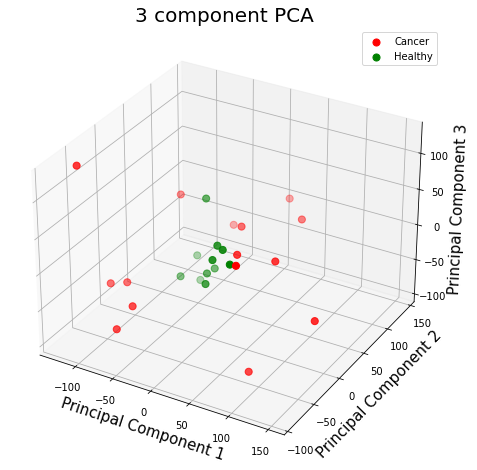

In [130]:
finalDf = pd.concat([principalDf, sample_info.reset_index()[['Cancer_or_healthy']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Cancer_or_healthy'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [128]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(tumor_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,89.502554,-4.718252,28.799292
1,11.616791,141.247883,0.715372
2,-47.661454,-71.911132,-32.389854
3,86.465360,-49.097728,-95.406365
4,10.560884,47.406744,19.147794
5,-55.929943,-89.382962,-55.290808
6,56.057704,98.145493,10.944242
7,50.970306,-19.516960,35.457194
8,-127.928305,-57.652731,126.500102
9,149.717690,-19.638993,-23.793081


In [31]:
#Take subset of data, the top 200 most differntially expressed genes
DE_genes = pd.read_csv('DE_Genes.csv',sep=',')

DE_genes['Gene'] = DE_genes['Unnamed: 0']

In [32]:
lung_luad_TCGA_norm_FPKM

de_genes = sorted(DE_genes['Gene'])

select_genes = lung_luad_TCGA_norm_FPKM[lung_luad_TCGA_norm_FPKM['Hugo_Symbol'].isin(de_genes)]

select_genes


,Hugo_Symbol,Entrez_Gene_Id,TCGA-55-6980-11A-01R-1949-07,TCGA-55-6984-11A-01R-1949-07,TCGA-50-5936-11A-01R-1628-07,TCGA-91-6849-11A-01R-1949-07,TCGA-55-6968-11A-01R-1949-07,TCGA-50-5930-11A-01R-1755-07,TCGA-49-6745-11A-01R-1858-07,TCGA-50-5931-11A-01R-1858-07,...,TCGA-44-6148-11A-01R-1858-07,TCGA-55-6979-11A-01R-1949-07,TCGA-55-6983-11A-01R-1949-07,TCGA-55-6982-11A-01R-1949-07,TCGA-44-2662-11A-01R-1758-07,TCGA-44-3396-11A-01R-1758-07,TCGA-44-2661-11A-01R-1758-07,TCGA-38-4626-11A-01R-1758-07,TCGA-55-6985-11A-01R-1949-07,TCGA-44-6147-11A-01R-1858-07
214,CES1,1066,6207.38,10659.59,11267.44,8840.04,12076.21,13306.94,5633.22,4210.15,...,7537.18,6652.97,8363.13,7695.57,8305.36,8658.09,7230.10,14461.21,13215.02,4769.75
395,SPAG4,6676,158.79,63.00,87.03,175.07,166.73,115.16,124.37,57.08,...,103.69,67.12,105.89,70.01,81.14,100.13,74.58,90.14,131.51,55.49
450,C19orf59,199675,2004.85,3257.52,3168.41,1617.00,5147.73,3901.01,4575.41,1175.27,...,2758.13,2061.24,2796.65,1561.89,1781.89,3443.31,2148.82,8134.41,2720.15,1781.89
668,ACVRL1,94,2384.37,1088.92,3589.58,3716.20,1697.45,2502.97,2090.03,3212.66,...,2178.83,1015.93,981.29,2627.46,2997.45,3982.99,2209.26,2502.97,2417.67,3081.75
696,CYP24A1,1591,13.72,8.25,3.76,28.24,2.07,3.50,12.36,1.01,...,63.45,4.58,57.49,26.47,0.00,5.59,2.32,56.68,51.35,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,VIPR1,7433,2271.40,447.82,3515.68,6426.31,753.83,2384.37,854.13,5403.70,...,2303.12,595.34,647.07,3325.99,3018.30,3540.14,947.83,2739.08,2193.99,1977.24
19513,EPHX3,79852,59.55,115.97,54.72,73.03,62.56,90.77,62.12,65.26,...,77.25,77.25,109.66,93.35,37.59,69.52,86.43,64.80,84.63,40.07
19552,GOLM1,51280,417.77,543.96,356.05,743.43,463.65,457.25,540.19,285.03,...,896.64,486.75,791.35,483.38,414.87,518.15,417.77,483.38,733.19,379.04
19635,B4GALNT4,338707,14.03,14.24,7.34,19.53,18.29,1.95,3.66,6.89,...,29.06,10.55,8.99,14.67,6.52,2.89,19.97,16.27,14.45,12.83


In [33]:

select_genes_norm_TPM_subset = lung_luad_TCGA_norm_TPM_subset[lung_luad_TCGA_norm_TPM_subset.index.isin(select_genes.index.values.tolist())]

select_genes_tumor_TPM_subset = lung_luad_TCGA_tumor_TPM_subset[lung_luad_TCGA_tumor_TPM_subset.index.isin(select_genes.index.values.tolist())]



tumor_norm_select = pd.concat((select_genes_tumor_TPM_subset, select_genes_norm_TPM_subset), axis=1)


tumor_norm_select

,TCGA-93-7348-01A-21R-2039-07,TCGA-91-8496-01A-11R-2403-07,TCGA-05-4397-01A-01R-1206-07,TCGA-69-7761-01A-11R-2170-07,TCGA-55-7281-01A-11R-2039-07,TCGA-50-6590-01A-12R-1858-07,TCGA-97-A4M1-01A-11R-A24X-07,TCGA-05-4402-01A-01R-1206-07,TCGA-44-7667-01A-31R-2066-07,TCGA-97-7552-01A-11R-2039-07,...,TCGA-50-5931-11A-01R-1858-07,TCGA-44-6778-11A-01R-1858-07,TCGA-44-2655-11A-01R-1758-07,TCGA-50-5935-11A-01R-1858-07,TCGA-55-6969-11A-01R-1949-07,TCGA-44-2668-11A-01R-1758-07,TCGA-91-6831-11A-02R-1858-07,TCGA-49-4512-11A-01R-1858-07,TCGA-55-6978-11A-01R-1949-07,TCGA-55-6983-11A-01R-1949-07
214,54.459321,117.374789,650.642659,27.814737,20.745286,14.301084,297.361657,27.665667,11.590827,90.560455,...,172.859237,348.684220,239.588328,322.023433,363.458875,358.246975,132.721489,376.595751,233.628174,326.315515
395,39.855011,6.812443,18.789152,58.858061,9.458059,64.524769,7.353438,53.121564,10.154961,24.740411,...,2.343576,3.975381,2.875377,2.103900,6.261804,3.727550,2.199915,6.682989,4.330131,4.131653
450,0.901826,114.164402,0.358448,2.153244,8.699970,0.727360,34.886835,6.110185,1.524205,1.512166,...,48.253928,88.357234,100.014045,79.366315,111.839850,222.044168,83.982189,133.127218,84.308667,109.120662
668,15.937595,20.720938,10.400745,10.290675,13.769257,13.433222,44.168964,12.791456,11.510726,25.261337,...,131.904554,143.562310,156.962869,109.187388,66.024383,87.685590,95.809256,53.675073,108.215852,38.288315
696,10.500266,2.824854,0.072842,13.130135,4.066566,22.467875,0.014904,33.138372,11.194442,4.040878,...,0.041468,0.453953,0.900574,0.217901,0.068860,0.158970,0.000000,0.043979,1.847781,2.243165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,10.796407,12.830981,1.085300,7.625071,2.352226,0.680526,50.043657,6.067847,5.813035,24.399015,...,221.863701,177.985455,74.225834,81.598974,57.872360,38.945120,161.158149,21.184588,133.239106,25.247602
19513,14.259748,2.353079,2.318904,12.078313,23.022624,15.545529,7.353438,9.221568,37.500945,6.063943,...,2.679428,1.967131,3.476039,2.848808,2.779758,3.549034,0.895802,2.153762,3.534080,4.278752
19552,161.777504,32.534399,84.152911,186.111658,85.433986,95.149399,22.843793,118.763234,48.814851,211.021403,...,11.702687,17.059021,20.702715,27.455939,24.309089,18.019675,13.819333,20.179700,30.618741,30.877170
19635,19.495182,0.496318,1.745074,3.432100,0.611003,20.104193,4.770570,1.070966,47.150584,1.055222,...,0.282888,1.034964,0.619957,0.842303,1.659881,0.179385,0.000000,0.519614,0.294366,0.350775


In [35]:
#transpose
tumor_norm_select_np = tumor_norm_select.T.to_numpy()

#replace dropout events with very small expression
tumor_norm_select_np[tumor_norm_select_np == 0] = 0.01

#normalize
tumor_norm_select_np = normalize_data(tumor_norm_select_np.copy())


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tumor_norm_select_np)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [38]:
finalDf = pd.concat([principalDf1, sample_info.reset_index()[['Cancer_or_healthy']]], axis = 1)

select_finalDF_output = finalDf

In [195]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(tumor_norm_select_np)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


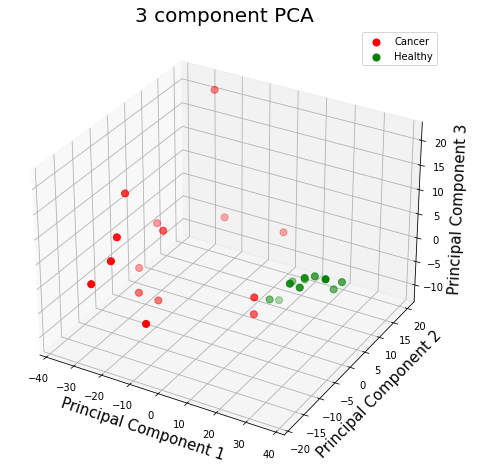

In [196]:
finalDf = pd.concat([principalDf, sample_info.reset_index()[['Cancer_or_healthy']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Cancer_or_healthy'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

1

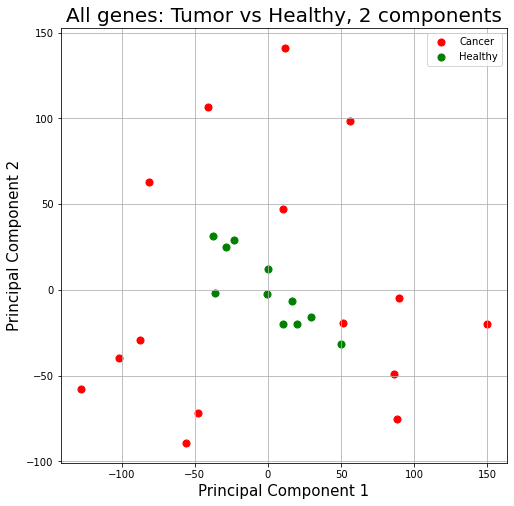

In [39]:
PCA_2d('All genes: Tumor vs Healthy, 2 components','Cancer', 'Healthy','Cancer_or_healthy',finalDF_output_norm)

1

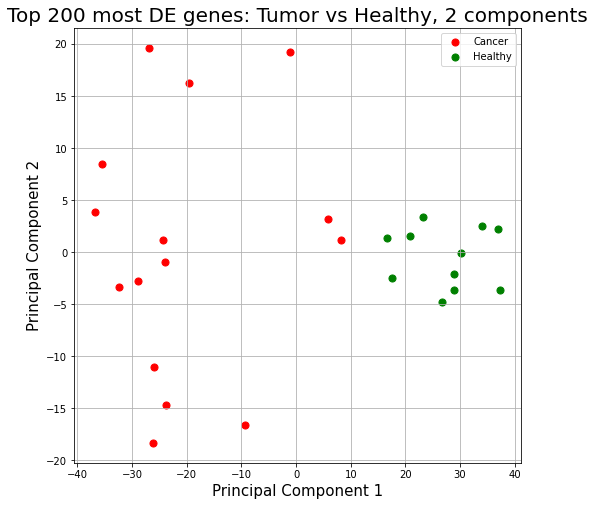

In [40]:
PCA_2d('Top 200 most DE genes: Tumor vs Healthy, 2 components','Cancer', 'Healthy','Cancer_or_healthy',select_finalDF_output)


Compare the clustering of different cancer and their subtypes

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

luad = pd.read_csv('luadrsemfpkmtcga_tumor.txt',sep='\t')

lusc = pd.read_csv('luscrsemfpkmtcga_tumor.txt',sep='\t')

In [8]:
#take sample of 50 from each dataset
luad_sub = luad.copy().iloc[:,2:52]
lusc_sub = lusc.copy().iloc[:,2:52]

luad=luad_sub
lusc=lusc_sub

luad_tpm = luad_sub.copy().div(luad_sub.sum(axis=0), axis=1)*1000000
lusc_tpm = lusc_sub.copy().div(lusc_sub.sum(axis=0), axis=1)*1000000



In [9]:
#join the two dataset together
luad_lusc = pd.concat((luad_tpm, lusc_tpm), axis=1)

#transpose
luad_lusc_np = luad_lusc.T.to_numpy()

#replace dropout events with very small expression
luad_lusc_np[luad_lusc_np == 0] = 0.01

#normalize
luad_lusc_np = normalize_data(luad_lusc_np.copy())


In [10]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(luad_lusc_np)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [11]:
#create sample_info
#first 50 are LUAD secound 50 are LUSC

luad_or_lusc = []

for i in range(0,100):
    if i < 50:
        luad_or_lusc.append('LUAD')
    else:
        luad_or_lusc.append('LUSC')

luad_lusc.columns.tolist()

sample_info = pd.DataFrame(list(zip(luad_lusc.columns.tolist(), luad_or_lusc)),columns = ['IDs','LUAD_or_LUSC'])



finalDf_luad_lusc = pd.concat([principalDf, sample_info.reset_index()[['LUAD_or_LUSC']]], axis = 1)

In [71]:

coad = pd.read_csv('coadrsemfpkmtcgat.txt',sep='\t')

read = pd.read_csv('readrsemfpkmtcgat.txt',sep='\t')


#take sample of 50 from each dataset
coad_sub = coad.copy().iloc[:,2:52]

read_sub = read.copy().iloc[:,2:52]


#convert from FPKM to TPM
coad_tpm = coad_sub.copy().div(coad_sub.sum(axis=0), axis=1)*1000000
read_tpm = read_sub.copy().div(read_sub.sum(axis=0), axis=1)*1000000



#join the two dataset together
coad_read = pd.concat((coad_tpm, read_tpm), axis=1)

#transpose
coad_read_np = coad_read.T.to_numpy()

#replace dropout events with very small expression
coad_read_np[coad_read_np == 0] = 0.02

#normalize
coad_read_np = normalize_data(coad_read_np.copy())



In [73]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(coad_read_np)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

coad_or_read = []

for i in range(0,100):
    if i < 50:
        coad_or_read.append('COAD')
    else:
        coad_or_read.append('READ')



sample_info = pd.DataFrame(list(zip(coad_read.columns.tolist(), coad_or_read)),columns = ['IDs','coad_or_read'])

finalDf_colon = pd.concat([principalDf, sample_info.reset_index()[['coad_or_read']]], axis = 1)

In [7]:
kich = pd.read_csv('kichrsemfpkmtcgat.txt',sep='\t')

kirc = pd.read_csv('kircrsemfpkmtcgat.txt',sep='\t')

kirp = pd.read_csv('kirprsemfpkmtcgat.txt',sep='\t')



#take sample of 50 from each dataset
kich_sub = kich.copy().iloc[:,2:52]

kirc_sub = kirc.copy().iloc[:,2:52]

kirp_sub = kirp.copy().iloc[:,2:52]


kich =kich_sub
kirc =kirc_sub
kirp = kirp_sub

#convert from FPKM to TPM
kich_tpm = kich_sub.copy().div(kich_sub.sum(axis=0), axis=1)*1000000
kirc_tpm = kirc_sub.copy().div(kirc_sub.sum(axis=0), axis=1)*1000000
kirp_tpm = kirp_sub.copy().div(kirp_sub.sum(axis=0), axis=1)*1000000



#join the two dataset together
kich_kirc = pd.concat((kich_tpm, kirc_tpm), axis=1)

kich_kirc_kirp = pd.concat((kich_kirc, kirp_tpm), axis=1)


#transpose
kich_kirc_kirp_np = kich_kirc_kirp.T.to_numpy()


#replace dropout events with very small expression
kich_kirc_kirp_np[kich_kirc_kirp_np == 0] = 0.02


#normalize
kich_kirc_kirp_np = normalize_data(kich_kirc_kirp_np.copy())


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(kich_kirc_kirp_np)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

kich_kirc_kirp_l = []

for i in range(0,150):
    if i < 50:
        kich_kirc_kirp_l.append('KICH')
    elif i<100:
        kich_kirc_kirp_l.append('KIRC')
    else:
        kich_kirc_kirp_l.append('KIRP')

kich_kirc_kirp.columns.tolist()

sample_info = pd.DataFrame(list(zip(kich_kirc_kirp.columns.tolist(), kich_kirc_kirp_l)),columns = ['IDs','kich_kirc_kirp'])

finalDf = pd.concat([principalDf, sample_info.reset_index()[['kich_kirc_kirp']]], axis = 1)

1

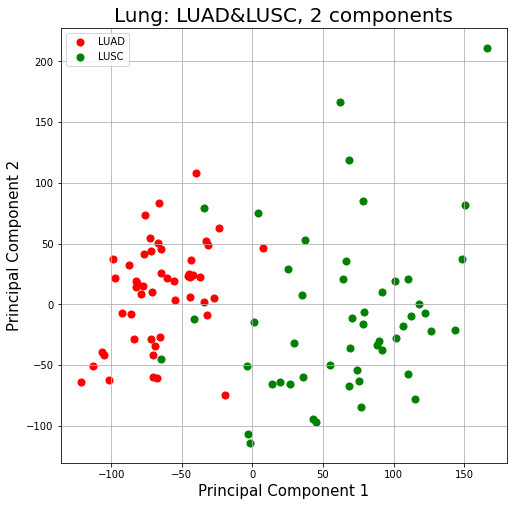

In [56]:
PCA_2d('Lung: LUAD&LUSC, 2 components','LUAD', 'LUSC',
       'LUAD_or_LUSC',finalDf_luad_lusc)



1

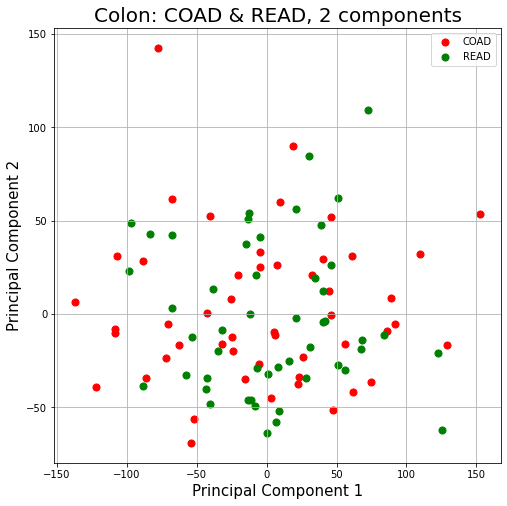

In [74]:
PCA_2d('Colon: COAD & READ, 2 components','COAD', 'READ',
       'coad_or_read',finalDf_colon)


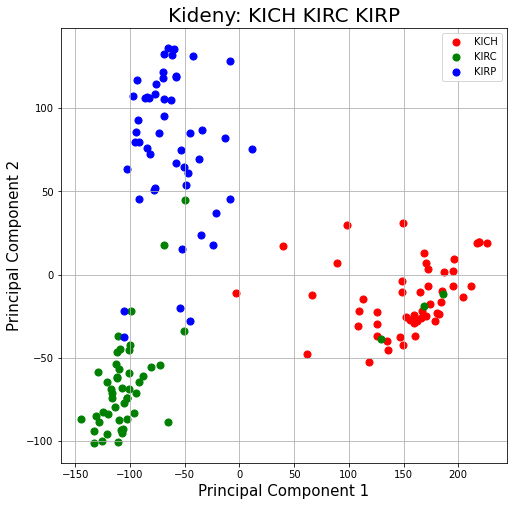

In [10]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Kideny: KICH KIRC KIRP', fontsize = 20)
targets = ['KICH', 'KIRC','KIRP']
colors = ['r', 'g','b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['kich_kirc_kirp'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Looking at the three cancer we can see that lung is generally clusters well togther, colon cancer does not seperate
into distinct clusters and kidney has clear clusters for each subtype of cancer. Interestingly the two colon cancers COAD and READ corresspound to the upper and lower tracts of the colon. Although being from different parts of the colon appear on first look to not have distinctly different gene expression. This could point to similarities in the treatment profiles for each 'type' even though distinctions between the two may not be useful.

Further work would be to do a k-means clustering algorithm itself and metrics for the clustering such as 
mean distance from centriod. This metric would allow for a quantitative number to the tightness of each cluster

Looking closly at the kidney clustering there are three KIRC datapoints found in the center of the 
KICH cluster, distinctly far away from the other KIRC. Further investigation could be done to see if those points
were mislabeled or if the diagnosis for KIRC was incorrect in those patient cases. 


The goal of this analysis was to do initial characterization different cancers and their subtypes. Looking beyond this basic analysis, another question would be to identify marker genes between different subtypes based on the clustering. This initial investigation aids in finding marker genes, because it clarifies which cancers are easier to find differences in types, kidney or lung compared to colon.



Looking even deeper into the futher, I aim to use this dataset alongside scRNA-seq data to do deconvolution of single cell counts from bulkRNA. Many papers have been written about converting bulkRNA to scRNA, and the since this dataset has already been cleaned and processed as specified in the paper. Converting this large dataset into single cell counts could be useful in identifing trends of single cells in a variety of cancers.

